In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

In [ ]:
df = pd.read_csv("../Datasets/Cuvinte-Eliminate/train-punct-stop-1000.csv")
df=df.dropna()
df=df.sample(n=100000)
#df=df.drop(["news_title","url","reddit_title"],axis=1)
df_train=df

In [2]:
df = pd.read_csv("../Datasets/Stem-Cuvinte-Eliminate/train-punct-stop-stem-1000.csv")
df=df.dropna()
df=df.sample(n=1500000)
#df=df.drop(["news_title","url","reddit_title"],axis=1)
df_train=df

In [3]:
X_train = df_train['text']

max phrase len: 121


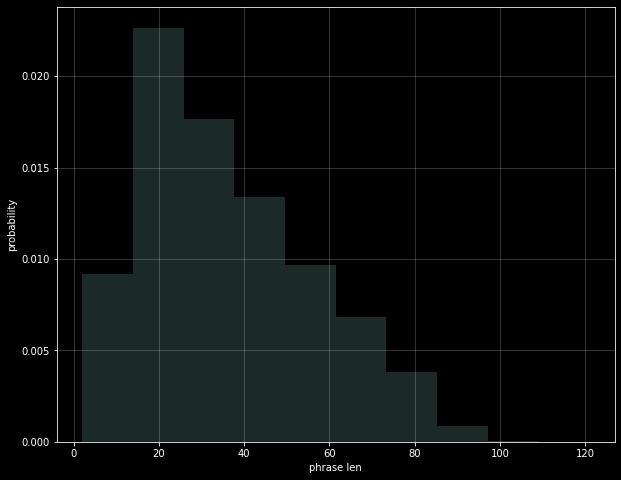

In [4]:
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
print('max phrase len: {0}'.format(max_phrase_len))
plt.figure(figsize = (10, 8))
plt.hist(phrase_len, alpha = 0.2, density = True)
plt.xlabel('phrase len')
plt.ylabel('probability')
plt.grid(alpha = 0.25)

In [5]:
y_train = df_train['sentiment'].values

In [6]:
train_labels=[]
for i in range(0,len(y_train)):
    train_labels.append([0,0])

In [7]:
len(y_train)

1500000

In [8]:
train_labels=np.array(train_labels)

In [9]:
y_train

array([0, 0, 2, ..., 2, 2, 2])

In [10]:
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        train_labels[i][0]=1
    else:
        train_labels[i][1]=1

In [11]:
train_labels

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [12]:
#max_words = 16384
max_words = 8192
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_phrase_len)

In [13]:
print(X_train[0])
print(train_labels[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0   22  587 1210 6362  482 3180  296  774
   89 2115  374 1155 2687   47  145  974  296    9  417    9  508  296
 4829  197 2702 1806  937  737   14   90  335]
[1 0]


In [14]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(2, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

2022-02-08 17:58:51.904203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 17:58:51.918319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 17:58:51.919089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 17:58:51.920590: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [15]:
history = model_lstm.fit(
    X_train,
    train_labels,
    validation_split = 0.1,
    epochs = 6,
    batch_size = 256
)

2022-02-08 17:58:52.787849: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 653400000 exceeds 10% of free system memory.
2022-02-08 17:58:53.241983: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6
5274/5274 [==============================] - 2465s 467ms/step - loss: 0.2786 - accuracy: 0.8836 - val_loss: 0.2373 - val_accuracy: 0.9029
Epoch 2/6
5274/5274 [==============================] - 2610s 495ms/step - loss: 0.2324 - accuracy: 0.9060 - val_loss: 0.2236 - val_accuracy: 0.9104
Epoch 3/6
5274/5274 [==============================] - 2623s 497ms/step - loss: 0.2149 - accuracy: 0.9136 - val_loss: 0.2155 - val_accuracy: 0.9136
Epoch 4/6
5274/5274 [==============================] - 2620s 497ms/step - loss: 0.2019 - accuracy: 0.9199 - val_loss: 0.2138 - val_accuracy: 0.9155
Epoch 5/6
5274/5274 [==============================] - 2616s 496ms/step - loss: 0.1917 - accuracy: 0.9242 - val_loss: 0.2113 - val_accuracy: 0.9171
Epoch 6/6
5274/5274 [==============================] - 2612s 495ms/step - loss: 0.1841 - accuracy: 0.9274 - val_loss: 0.2118 - val_accuracy: 0.9168


(Text(0, 0.5, 'Cross-entropy loss'),)

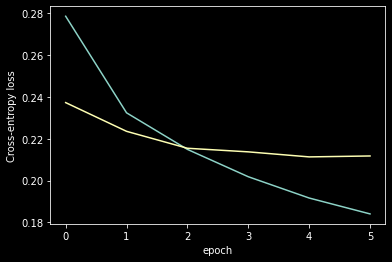

In [16]:
plt.plot(history.history['loss'], label='train loss'),
plt.plot(history.history['val_loss'], label='val loss'),
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss"),

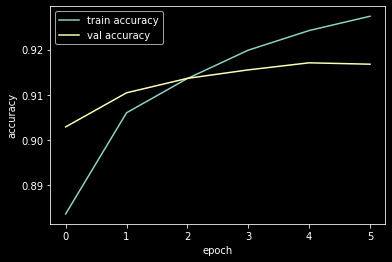

In [17]:
    plt.plot(history.history['accuracy'], label='train accuracy'),
    plt.plot(history.history['val_accuracy'], label='val accuracy'),
    plt.xlabel("epoch"),
    plt.ylabel("accuracy"),
    plt.legend();

In [18]:
model_lstm.save('./Model-nou/')

2022-02-08 22:38:57.214529: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./Model-nou/assets


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)